In [2]:
import pandas as pd
import numpy as np

In [3]:
selloutData = pd.read_csv("../dataset/kopo_channel_seasonality_new.csv")

In [28]:
selloutData.head(5)

,REGIONID,PRODUCT,YEARWEEK,QTY,NEW_QTY,WEEK,YEAR
0,A60,PRODUCT4,201402,71.0,71.0,2,2014.0
1,A60,PRODUCT59,201402,22275.0,22275.0,2,2014.0
2,A60,PRODUCT34,201402,4463.0,4463.0,2,2014.0
3,A60,PRODUCT47,201402,0.0,0.0,2,2014.0
4,A60,PRODUCT56,201402,23.0,23.0,2,2014.0


In [5]:
# np.wherer(조건, 해당시 조치, 아닐시 조치)
selloutData['NEW_QTY'] = np.where(selloutData['QTY'] < 0,0,selloutData['QTY']) 

In [6]:
selloutData[selloutData.QTY >= 0].head(2) #변수에 담지 않으면 확인만 하고 끝남

,REGIONID,PRODUCT,YEARWEEK,QTY,NEW_QTY
0,A60,PRODUCT4,201402,71.0,71.0
1,A60,PRODUCT59,201402,22275.0,22275.0


In [7]:
#53주차 제거  <실수> dtypessssssssss
selloutData.dtypes 

REGIONID     object
PRODUCT      object
YEARWEEK      int64
QTY         float64
NEW_QTY     float64
dtype: object

In [8]:
int(201623/100) #문자형으로 찢지 않고, 100으로 나눈 나머지하면 주차가 나와 
201623%100

23

In [9]:
selloutData['WEEK']  = selloutData['YEARWEEK']%100 

In [10]:
def customFunction(inputColumn):  
    yearValue = int(inputColumn / 100) #<실수>int(yearValue) 만 써서 변수에 담지를 못했어 
    return yearValue     #return 값에는 자료형을 선언하지 않음

In [11]:
#selloutData['TEST'] = (selloutData.YEARWEEK/100).astype(int) ##바로 바꿔서 컬럼에 집어넣음

In [12]:
#함수 구조 생각해보기
#1.100으로 나눠서 int 값으로 정수만 출력
inputColumn = 201601 
yearValue = 201601/100
int(yearValue)
# return yearValue

2016

In [138]:
selloutData["YEAR"] = selloutData["YEARWEEK"].apply(customFunction) ##함수적용 
selloutData.head(2)

,REGIONID,PRODUCT,YEARWEEK,QTY,NEW_QTY,WEEK,YEAR
0,A60,PRODUCT4,201402,71.0,71.0,2,2014
1,A60,PRODUCT59,201402,22275.0,22275.0,2,2014


In [139]:
#2.round 처리하는 방법 -- 무조건 소수점이 나오니깐 안되네 & 반올림이라서 50주차 부터는 년도가 올라가 
#int(round(yearValue,0))   #int 를 사용해주면 돼

In [140]:
selloutData['YEAR']  = (selloutData['YEARWEEK']/100).astype(int) ##숫자문자

In [141]:
refinedData = selloutData[selloutData.WEEK < 53]

In [142]:
refinedData.head()

,REGIONID,PRODUCT,YEARWEEK,QTY,NEW_QTY,WEEK,YEAR
0,A60,PRODUCT4,201402,71.0,71.0,2,2014
1,A60,PRODUCT59,201402,22275.0,22275.0,2,2014
2,A60,PRODUCT34,201402,4463.0,4463.0,2,2014
3,A60,PRODUCT47,201402,0.0,0.0,2,2014
4,A60,PRODUCT56,201402,23.0,23.0,2,2014


In [143]:
## 정렬하기 
## sortKey 선언
sortKey = ['REGIONID','PRODUCT','YEARWEEK']

In [144]:
sortedData = refinedData.sort_values(sortKey)

In [97]:
sortedData.head(5)

,REGIONID,PRODUCT,YEARWEEK,QTY,NEW_QTY,WEEK,YEAR
298,A00,PRODUCT34,201401,661.0,661.0,1,2014
1757,A00,PRODUCT34,201402,679.0,679.0,2,2014
3125,A00,PRODUCT34,201403,578.0,578.0,3,2014
205,A00,PRODUCT34,201404,532.0,532.0,4,2014
4369,A00,PRODUCT34,201405,516.0,516.0,5,2014


In [98]:
## sort 때문에 원래 인덱스가 다 섞였어
## 인덱스 예쁘게 만들어주기 방법 두가지 1.기존 인덱스 유지 2.기존 인덱스 삭제  하며 새로이 인덱스 달기 

#기존 인덱스는 유지하고(원래 데이터 파악하기 위해), 새로 인덱스 만들어서 정렬하는 방법
stepData = sortedData.reset_index()
stepData.head(5)

,index,REGIONID,PRODUCT,YEARWEEK,QTY,NEW_QTY,WEEK,YEAR
0,298,A00,PRODUCT34,201401,661.0,661.0,1,2014
1,1757,A00,PRODUCT34,201402,679.0,679.0,2,2014
2,3125,A00,PRODUCT34,201403,578.0,578.0,3,2014
3,205,A00,PRODUCT34,201404,532.0,532.0,4,2014
4,4369,A00,PRODUCT34,201405,516.0,516.0,5,2014


In [99]:
#얘는 기존 인덱스를 삭제하고, 새로운 인덱스를 만들어서 정렬하는 방법  (drop = True)
step1Data = sortedData.reset_index(drop = True)
step1Data.head(5)

,REGIONID,PRODUCT,YEARWEEK,QTY,NEW_QTY,WEEK,YEAR
0,A00,PRODUCT34,201401,661.0,661.0,1,2014
1,A00,PRODUCT34,201402,679.0,679.0,2,2014
2,A00,PRODUCT34,201403,578.0,578.0,3,2014
3,A00,PRODUCT34,201404,532.0,532.0,4,2014
4,A00,PRODUCT34,201405,516.0,516.0,5,2014


## rolling : 기본 이동평균 함수

In [23]:
# rolling 함수를 스기 전에는 먼저 정렬을 해주고 사용해야 해- 이동평균은 앞뒤 데이터가 중요하니깐
# & rolling 함수 때만 쓰는 것은 아님 

#계절성지수 = 판매량 / 이동평균

In [100]:
#min_period 옵션을 정하면 평균구하는 구간의 최소길이를 정해줄 수 있음. min_periods = 1 로 하면 나만 있어도 돼  
step1Data['MA'] = step1Data.NEW_QTY.rolling(window=15, center = True, min_periods = 1).mean() 

# 스파크에는 함수가 없어서 100줄 정도 되는 코드로 만들어야 해

In [101]:
#stepData.head(52).to_csv("./testSave.csv")   ##csv 파일로 (위치) 에 저장  ./ : 현재경로
step1Data.head(5)

,REGIONID,PRODUCT,YEARWEEK,QTY,NEW_QTY,WEEK,YEAR,MA
0,A00,PRODUCT34,201401,661.0,661.0,1,2014,520.000000
1,A00,PRODUCT34,201402,679.0,679.0,2,2014,514.444444
2,A00,PRODUCT34,201403,578.0,578.0,3,2014,516.800000
3,A00,PRODUCT34,201404,532.0,532.0,4,2014,503.363636
4,A00,PRODUCT34,201405,516.0,516.0,5,2014,490.750000


In [102]:
##groupby
filteredData = step1Data[(step1Data.REGIONID == "A00") & (step1Data.PRODUCT == "PRODUCT34")]

In [103]:
groupKey = ['REGIONID','PRODUCT','YEAR']

In [104]:
filteredData.groupby(groupKey)[["NEW_QTY"]].mean()

NEW_QTY
REGIONID PRODUCT   YEAR            
A00      PRODUCT34 2014  275.961538
                   2015   86.634615
                   2016   36.576923

In [105]:
import matplotlib.pyplot as plt

In [106]:
x=stepData.WEEK
y=stepData.QTY

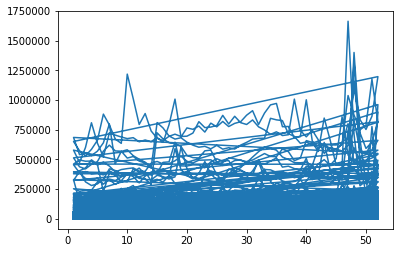

In [107]:
plt.plot(x,y)

#### 데이터 합치기: pd.merge

In [108]:
groupData = step1Data.groupby(groupKey)[["NEW_QTY"]].mean() ##지역 상품 연도별로 평균을 구함
groupData.head(1)

,,,NEW_QTY
REGIONID,PRODUCT,YEAR,
A00,PRODUCT34,2014,275.961538


In [109]:
##groupData 행, 열 만들어보기

groupDataResult = groupData.reset_index()
# groupDataResult = groupDataResult.sort_values(groupKey)

In [110]:
groupDataResult.columns = ['REGIONID','PRODUCT','YEAR','GROUP']
groupDataResult.head(2)

,REGIONID,PRODUCT,YEAR,GROUP
0,A00,PRODUCT34,2014,275.961538
1,A00,PRODUCT34,2015,86.634615


In [75]:
filteredDataResult = filteredData.reset_index(drop=True)

In [111]:
filteredDataResult.head()

,REGIONID,PRODUCT,YEARWEEK,QTY,NEW_QTY,WEEK,YEAR,MA
0,A00,PRODUCT34,201401,661.0,661.0,1,2014.0,520.000000
1,A00,PRODUCT34,201402,679.0,679.0,2,2014.0,514.444444
2,A00,PRODUCT34,201403,578.0,578.0,3,2014.0,516.800000
3,A00,PRODUCT34,201404,532.0,532.0,4,2014.0,503.363636
4,A00,PRODUCT34,201405,516.0,516.0,5,2014.0,490.750000


In [112]:
# step1Data = stepData.reset_index()
# stepData.head(2)

In [113]:
joinKey = ['REGIONID','PRODUCT','YEAR']
mergeResult = pd.merge(step1Data, groupDataResult,how = 'left', on = joinKey) 
#                       left_on = joinKey, right_on = joinKey, how = 'left')\
                     
                      ##left/ right_on 이 다 같다면 그냥 on = "컬럼명" 으로 쓰면 됨
mergeResult.head(10)

,REGIONID,PRODUCT,YEARWEEK,QTY,NEW_QTY,WEEK,YEAR,MA,GROUP
0,A00,PRODUCT34,201401,661.0,661.0,1,2014,520.000000,275.961538
1,A00,PRODUCT34,201402,679.0,679.0,2,2014,514.444444,275.961538
2,A00,PRODUCT34,201403,578.0,578.0,3,2014,516.800000,275.961538
3,A00,PRODUCT34,201404,532.0,532.0,4,2014,503.363636,275.961538
4,A00,PRODUCT34,201405,516.0,516.0,5,2014,490.750000,275.961538
5,A00,PRODUCT34,201406,423.0,423.0,6,2014,480.230769,275.961538
6,A00,PRODUCT34,201407,407.0,407.0,7,2014,468.214286,275.961538
7,A00,PRODUCT34,201408,364.0,364.0,8,2014,456.666667,275.961538
8,A00,PRODUCT34,201409,470.0,470.0,9,2014,431.533333,275.961538
9,A00,PRODUCT34,201410,538.0,538.0,10,2014,402.066667,275.961538


In [114]:
len(mergeResult)

123864

In [115]:
mergeResult = mergeResult.reset_index(drop= True)

In [116]:
mergeResult.head()

,REGIONID,PRODUCT,YEARWEEK,QTY,NEW_QTY,WEEK,YEAR,MA,GROUP
0,A00,PRODUCT34,201401,661.0,661.0,1,2014,520.000000,275.961538
1,A00,PRODUCT34,201402,679.0,679.0,2,2014,514.444444,275.961538
2,A00,PRODUCT34,201403,578.0,578.0,3,2014,516.800000,275.961538
3,A00,PRODUCT34,201404,532.0,532.0,4,2014,503.363636,275.961538
4,A00,PRODUCT34,201405,516.0,516.0,5,2014,490.750000,275.961538


In [117]:
len(mergeResult)

123864


### groupby rolling 함수 만들기

In [121]:
groupKey2 = ["REGIONID","PRODUCT"] ## 키가 될 아이들을 그룹으로 선언 

In [122]:
groupDataset = MergeResult.groupby(groupKey2)

In [156]:
## 기존의 이동평균은 주차기준 판매량을 정렬해서, REGIONID, PRODUCT 에 따라서 그룹핑 한 후 이동평균 구하는 함수

def groupRolling(onething):
    
    #oneGroup = groupDataSet.get_group(list(groupDataSet.groups)[2])
    #oneGroup.head()
    
    indexGroupData = onething.reset_index(drop = True)
    indexGroupData["MA2"] = indexGroupData["NEW_QTY"].rolling(window = 5, center=True).mean()

    return indexGroupData

In [157]:
finalResult = mergeResult.groupby(groupKey2).apply(groupRolling) 

In [165]:
finalResult.head()

REGIONID    PRODUCT  YEARWEEK    QTY  NEW_QTY  WEEK  \
REGIONID PRODUCT                                                           
A00      PRODUCT34 0      A00  PRODUCT34    201401  661.0    661.0     1   
                   1      A00  PRODUCT34    201402  679.0    679.0     2   
                   2      A00  PRODUCT34    201403  578.0    578.0     3   
                   3      A00  PRODUCT34    201404  532.0    532.0     4   
                   4      A00  PRODUCT34    201405  516.0    516.0     5   

                      YEAR          MA       GROUP    MA2  
REGIONID PRODUCT                                           
A00      PRODUCT34 0  2014  520.000000  275.961538    NaN  
                   1  2014  514.444444  275.961538    NaN  
                   2  2014  516.800000  275.961538  593.2  
                   3  2014  503.363636  275.961538  545.6  
                   4  2014  490.750000  275.961538  491.2

In [169]:
## 이 함수의 최근 4주 평균
mergeResult["Avg4"] = mergeResult["NEW_QTY"].rolling(window = 4, center = False).mean()
mergeResult.head(1)

,REGIONID,PRODUCT,YEARWEEK,QTY,NEW_QTY,WEEK,YEAR,MA,GROUP,Avg4
0,A00,PRODUCT34,201401,661.0,661.0,1,2014,520.0,275.961538,NaN


In [170]:
## rolling 함수 만들기 
groupKey3 = ['REGIONID','PRODUCT']

In [ ]:
def groupFunction(eachgroup):
    eachGroup['MA3'] = eachgroup['NEW_QTY'].rolling(window = 5, center = True).mean()
    
    

In [171]:
## concat 